In [1]:
#This program uses the gyro and some known measurements on Zumi
#such as the wheel diameter and length between wheel to wheel
#to determine the Rotation per second of each motor at a set speed
#do note that varying battery/power levels will result in
#different Rotation per second

from zumi.zumi import Zumi
import matplotlib.pyplot as plt
import numpy as np
import time
import math

zumi = Zumi()

def calc_motor_data(motor,time_out=0.5,set_speed=40,graphs=False,
                    wheel_2_wheel_dist = 6.3,wheel_rad = 1.5):
    zumi.reset_gyro()

    time_list = []
    gyro_list = []
    batt_list = []

    #reset variables
    ang_speed_list = []
    init_time = time.time()
    time_passed = 0
    
    try:
        #turn left motor ---------------------
        while(True):
            time_passed = time.time()-init_time
            if motor == "LEFT":
                zumi.control_motors(0,set_speed)
            elif motor =="RIGHT":
                zumi.control_motors(set_speed,0)
            else:
                print("please select a motor")
                break
            
            current_angle = zumi.update_angles()[2]
            ang_speed_list.append(zumi.mpu_list[5])
            time_list.append(time.time())
            gyro_list.append(current_angle) 
            batt_list.append(zumi.get_battery_voltage())

            if time_passed >= time_out:
                break  
            if abs(current_angle)>359:
                break
    finally:
        zumi.stop()

        wheel_circumference = 2*math.pi*wheel_rad
        
        arc_length = abs(2*math.pi*current_angle/360*wheel_2_wheel_dist)
        num_turns = arc_length/wheel_circumference
        rps = num_turns/time_passed
        avg_ang_speed = sum(ang_speed_list)/len(ang_speed_list)
        wheel_speed = rps*wheel_circumference
        try:
            if graphs == True:
                plt.plot(time_list,gyro_list,'go')
                plt.ylabel('gyro')
                plt.xlabel('time')
                plt.show()

                plt.plot(time_list,batt_list,'go')
                plt.ylabel('battery')
                plt.xlabel('time')
                plt.show()
        except:
            pass
        
    return [rps,wheel_speed,arc_length,num_turns,avg_ang_speed]

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated


In [2]:
data = calc_motor_data("LEFT",set_speed=40)
print("LEFT MOTOR")
print("motor ",int(data[0]*100)/100, "rotations per second")
print("motor speed ",int(data[1]*100)/100, "cm/s")

LEFT MOTOR
motor  0.96 rotations per second
motor speed  9.04 cm/s


In [3]:
print(calc_motor_data("LEFT",set_speed=40))
zumi.stop()
time.sleep(1)

# print(calc_motor_data("LEFT",set_speed=-40))
# zumi.stop()
# time.sleep(1)

# print(calc_motor_data("RIGHT",set_speed=40))
# zumi.stop()
# time.sleep(1)

# print(calc_motor_data("RIGHT",set_speed=-40))
# zumi.stop()
# time.sleep(1)

[0.9553928897689715, 9.004365851370371, 4.534378606940765, 0.4811125127631768, -78.27690259699665]


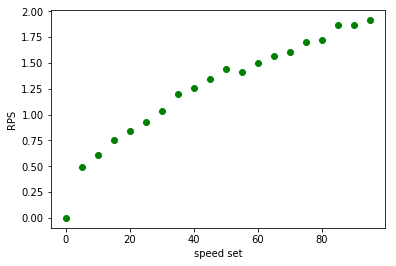

In [8]:
rps_list = []
speed_list = []

for i in range(20):
    speed_now = 5*i
    rps = calc_motor_data("LEFT",set_speed=speed_now)[0]
    speed_list.append(speed_now)
    rps_list.append(rps)
    zumi.stop()
    time.sleep(0.7)
        
plt.plot(speed_list,rps_list,'go')
plt.ylabel('RPS')
plt.xlabel('speed set')
plt.show()
left_rps_list = rps_list

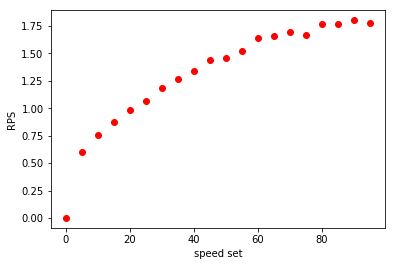

In [9]:
rps_list = []
speed_list = []

for i in range(20):
    speed_now = 5*i
    rps = calc_motor_data("RIGHT",set_speed=speed_now)[0]
    speed_list.append(speed_now)
    rps_list.append(rps)
    zumi.stop()
    time.sleep(0.7)
        
plt.plot(speed_list,rps_list,'ro')
plt.ylabel('RPS')
plt.xlabel('speed set')
plt.show()
right_rps_list = rps_list

In [6]:
print(left_rps_list)

[0.0007063756810980087, 0.31864864079469857, 0.4963227694093952, 0.5706281040240658, 0.6653673663990957, 0.7877654944814636, 0.8519813810558846, 0.8744717012806541, 0.9927661038717672, 1.1298007272133987, 1.180215366734245, 1.1684105164800083, 1.1531989271956835, 1.3767510876134674, 1.5272190445299074, 1.4505705184178228, 1.3982856352128517, 1.3139532177120756, 1.6015677839658733, 1.694817012228366]


In [7]:
print(right_rps_list)

[0.0002960837515314085, 0.5112146701908985, 0.6325226215322513, 0.7523834148750959, 0.8716979189153241, 0.9712813246919344, 0.9577150065899225, 1.1491552267955936, 1.18636059407009, 1.320996098727287, 1.4044285029860617, 1.4893157655729263, 1.4611249437121658, 1.5622969309101082, 1.588375291631027, 1.6379206433296343, 1.6363099525554152, 1.6968156099590075, 1.6286805474593815, 1.7013106006397778]


In [17]:
for i in range(100):
    zumi.control_motors(20,35)
zumi.stop()